In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [52]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [8]:
label = LabelEncoder()
label.fit(df['Gender'])
df['Gender'] = label.transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [12]:
X = df[['Gender','Age','EstimatedSalary']]
Y = df[['Purchased']]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

**Feature Scaling**

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [38]:
obj = DecisionTreeClassifier()
dtree = obj.fit(x_train,y_train)

**Predicting the Test set results**

In [27]:
y_pred = obj.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [28]:
print('Accuracy score: ',accuracy_score(y_test,y_pred))

Accuracy score:  0.8666666666666667


**Making the Confusion Matrix**

In [30]:
print(confusion_matrix(y_test,y_pred))

[[66  8]
 [ 8 38]]


**Visualising the Training set results**

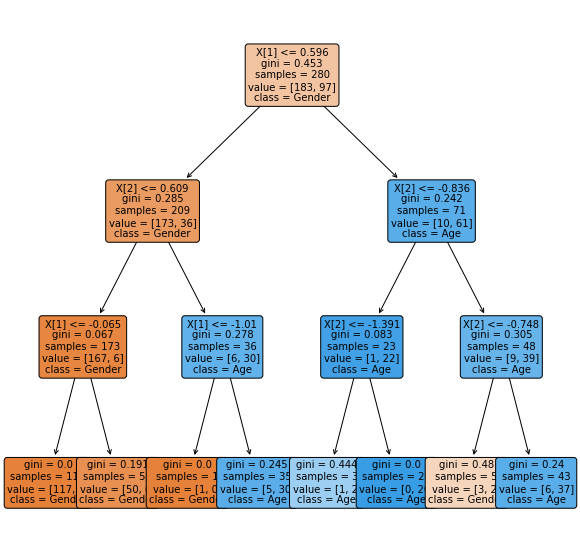

In [54]:
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(x_train,y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(clf_tree,class_names=X.columns,rounded=True,filled=True,fontsize=10)
plt.show()

**Visualising the Test set results**

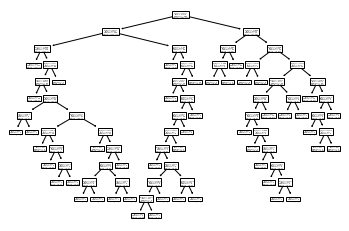

In [51]:
tree.plot_tree(obj)
plt.show()